<a href="https://colab.research.google.com/github/IamGyal/Gyal/blob/master/RailFeatureClassification_CNN_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Microsft One Drive in Google Colab

In [ ]:
# OneDrive mount - source: https://www.youtube.com/watch?v=U6YPgARhRzA&ab_channel=BoostUpStation

In [ ]:
!wget https://downloads.rclone.org/v1.54.0/rclone-v1.54.0-linux-amd64.deb
!apt install ./rclone-v1.54.0-linux-amd64.deb

--2021-04-22 15:49:14--  https://downloads.rclone.org/v1.54.0/rclone-v1.54.0-linux-amd64.deb
Resolving downloads.rclone.org (downloads.rclone.org)... 5.153.250.7, 2a02:24e0:8:61f9::1
Connecting to downloads.rclone.org (downloads.rclone.org)|5.153.250.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14296226 (14M) [application/x-debian-package]
Saving to: ‘rclone-v1.54.0-linux-amd64.deb’

rclone-v1.54.0-linu 100%[===================>]  13.63M  72.7MB/s    in 0.2s    

2021-04-22 15:49:14 (72.7 MB/s) - ‘rclone-v1.54.0-linux-amd64.deb’ saved [14296226/14296226]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'rclone' instead of './rclone-v1.54.0-linux-amd64.deb'
The following NEW packages will be installed:
  rclone
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 0 B/14.3 MB of archives.
After this operation, 44.9 MB of additional disk space will be used.
Get:1 /content/

### 2. Authenticate One Drive

In [ ]:
!rclone config

### 3. Mount One Drive
To stream files we need to mount One Drive.

In [ ]:
!sudo mkdir /content/onedrive
!nohup rclone --vfs-cache-mode writes mount onedrive: /content/onedrive &

nohup: appending output to 'nohup.out'


# Main Code

In [ ]:
#TEST
x = np.random.rand(8,2,4)
print(x)
print(x.shape)


x_val = np.concatenate((x[1:3], x[4:6]), axis=0)   # 10000 values from the end
print(x_val)
print(x_val.shape)
x = np.concatenate((x[0:1], x[3:4]), axis=0)  # All values from the beginning except 10000 values at the end
print(x)
print(x.shape)

In [ ]:
import numpy as np
import os
import re
from os import path

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.utils import to_categorical
import pandas as pd
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# load file list
file_list = []
with open('/content/onedrive/SP_Machine Learning/Sperry_data/file_list.txt', 'r') as f:
    for line in f:
        currentfile = line[:-1] # remove linebreak which is the last character of the string
        file_list.append(currentfile)  # add item to the list

# print(type(file_list[100]))
# print(file_list[100])
flie_list_len = len(file_list)
print('number of files: ', flie_list_len)
print(file_list[0])

number of files:  6149
/content/onedrive/SP_Machine Learning/Sperry_data/Runs_Real_Labeled/206 - 2018-05-05 - 0500-H/206 - 2018-05-05 - 0500-H/2018-12-19 - 0500-H - 05_05_18 - A/504 - 2018_05_05 - 0500-H - 0000494320 - Weld - 10000C.jsn


In [ ]:
fname = file_list[0].split('/')[-1]
print(fname)
fname2 = fname.replace('jsn','iq')
print(fname2)

504 - 2018_05_05 - 0500-H - 0000494320 - Weld - 10000C.jsn
504 - 2018_05_05 - 0500-H - 0000494320 - Weld - 10000C.iq


In [ ]:
#Test - count each class
cnt_10000 = 0
cnt_FlatWeld = 0
cnt_Weld = 0
cnt_others = 0

for file_withPath in file_list:
  file_noPath = file_withPath.split('/')[-1]  # extract file name only, without full path
  if file_noPath.find('10000') == -1:  # skip if the file name doesn't contain '10000'
    continue

  # print(file_withPath)
  if file_noPath.find('FlatWeld') != -1:  # if the file name contain 'FlatWeld'
    cnt_FlatWeld += 1
  elif file_noPath.find('Weld') != -1:  # if the file name contain 'Weld'
    cnt_Weld += 1
  else:
    cnt_others += 1

cnt_10000 = cnt_FlatWeld + cnt_Weld + cnt_others

print('cnt_10000', cnt_10000)
print('cnt_FlatWeld', cnt_FlatWeld)
print('cnt_Weld', cnt_Weld)
print('cnt_Not_Weld', cnt_others)

cnt_10000 4854
cnt_FlatWeld 752
cnt_Weld 3372
cnt_Not_Weld 730


In [ ]:
#Test. Creating a directory
IQpath = "/content/onedrive/SP_Machine Learning/Sperry_data/IQ"

try:
    os.mkdir(IQpath)
except OSError:
    print ("Creation of the directory %s failed" % IQpath)
else:
    print ("Successfully created the directory %s " % IQpath)

Successfully created the directory /content/onedrive/SP_Machine Learning/Sperry_data/IQ 


In [ ]:
IQpath = "/content/onedrive/SP_Machine Learning/Sperry_data/IQ"
print(path.exists(IQpath))
if path.exists(IQpath) != True:
  try:
    os.mkdir(IQpath)
  except OSError:
    print ("Creation of the directory %s failed" % IQpath)
  else:
    print ("Successfully created the directory %s " % IQpath)

print(path.exists(IQpath))

True
True


In [ ]:
os.listdir('/content/onedrive/SP_Machine Learning/Sperry_data/IQ')

[]

In [ ]:
fpath = "/content/onedrive/SP_Machine Learning/Sperry_data/IQ/"
result_loaded = []

file_withPath = file_list[0]
print(file_withPath)
file_noPath = file_withPath.split('/')[-1]  # extract file name only, without full path
print(file_noPath)
fnewName = file_noPath.replace('jsn','txt')
# file_newPath = fpath + fnewName
file_newPath = os.path.join(fpath, fnewName)
print(file_newPath)


places_list = ['Berlin', 'Cape Town', 'Sydney', 'Moscow']

with open('/content/onedrive/SP_Machine Learning/Sperry_data/IQ/listfile.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % place for place in places_list)


# with open(file_newPath, 'w') as f:
#   f.writelines("%i\n" % value for value in result)

/content/onedrive/SP_Machine Learning/Sperry_data/Runs_Real_Labeled/206 - 2018-05-05 - 0500-H/206 - 2018-05-05 - 0500-H/2018-12-19 - 0500-H - 05_05_18 - A/504 - 2018_05_05 - 0500-H - 0000494320 - Weld - 10000C.jsn
504 - 2018_05_05 - 0500-H - 0000494320 - Weld - 10000C.jsn
/content/onedrive/SP_Machine Learning/Sperry_data/IQ/504 - 2018_05_05 - 0500-H - 0000494320 - Weld - 10000C.txt


In [ ]:
fpath = "/content/onedrive/SP_Machine Learning/Sperry_data/IQ/"
result_loaded = []

file_withPath = file_list[0]
print(file_withPath)
file_noPath = file_withPath.split('/')[-1]  # extract file name only, without full path
print(file_noPath)
fnewName = file_noPath.replace('jsn','txt')
file_newPath = fpath + fnewName
print(file_newPath)

with open(file_withPath, 'r') as targetfile:
  data_read = targetfile.read()       # str. full contents of the jsn file
  splited1 = data_read.split('"I":')  # list. the jsn file contents split into two by 'I"'
  set_IQ = splited1[1]                # str. the set containing I and Q values
  result = [int(s) for s in re.findall(r'-?\d+', set_IQ)] # list. len 200000. the set containing only values
  print(result)
  print(type(result))

with open(file_newPath, 'w') as f:
  f.writelines("%i\n" % value for value in result)

#Load file, read lines, remove linebreak, convert str to int, add to list  
with open(file_newPath, 'r') as f:
  result_loaded = [int(current_value.rstrip()) for current_value in f.readlines()]
  # print(result_loaded)
  # print(type(result_loaded))

if result != result_loaded:
  print('not the same')

In [ ]:
fpath = '/content/onedrive/SP_Machine Learning/Sperry_data/IQ/'
result_loaded = []

for file_withPath in file_list:
  # print(file_withPath)
  file_noPath = file_withPath.split('/')[-1]  # extract file name only, without full path
  # print(file_noPath)
  fnewName = file_noPath.replace('jsn','txt')
  file_newPath = fpath + fnewName
  print(file_newPath)

  with open(file_withPath, 'r') as targetfile:
    data_read = targetfile.read()       # str. full contents of the jsn file
    splited1 = data_read.split('"I":')  # list. the jsn file contents split into two by 'I"'
    set_IQ = splited1[1]                # str. the set containing I and Q values
    result = [int(s) for s in re.findall(r'-?\d+', set_IQ)] # list. len 200000. the set containing only values
    # print(result)
    # print(type(result))

  with open(file_newPath, 'w') as f:
    f.writelines("%i\n" % value for value in result)

  #Load file, read lines, remove linebreak, convert str to int, add to list  
  with open(file_newPath, 'r') as f:
    result_loaded = [int(current_value.rstrip()) for current_value in f.readlines()]
    # print(result_loaded)
    # print(type(result_loaded))

  if result != result_loaded:
    print('not the same')

In [ ]:
result_loaded = np.array(result_loaded).T
print(result_loaded)

[-914 -913 -916 ... 7014 7008 7005]


In [ ]:
print(result_loaded.shape)

(200000,)


In [ ]:
target_data = []

i = 0
for file_withPath in file_list:
  if i > 10:
    break

  print(file_withPath)
  file_noPath = file_withPath.split('/')[-1]  # extract file name only, without full path
  print(file_noPath)

  with open(file_withPath, 'r') as targetfile:
    data_read = targetfile.read()       # str. full contents of the jsn file
    splited1 = data_read.split('"I":')  # list. the jsn file contents split into two by 'I"'
    set_IQ = splited1[1]                # str. the set containing I and Q values
    result = [int(s) for s in re.findall(r'-?\d+', set_IQ)] # list. len 200000. the set containing only values
    result = np.array(result).T
    print(result)
    np.savetxt(file_withPath.replace('jsn','iq'), x_train_re2D, delimiter=",") 



    target_data.append(result)  # put the resulting list in the array
    target_data_label.append(1)
  i=i+1

  
  

  if file_noPath.find('10000') == -1:  # skip if the file name doesn't contain '10000'
    continue

  print(file_withPath)
  if file_noPath.find('Weld') != -1:  # if the file name contain 'Weld'
    if i<nTrn1:
      print('i: ', i, 'The feature is Weld')
      with open(file_withPath, 'r') as targetfile:
        data_read = targetfile.read()  # str. full contents of the jsn file
        # splited1 = data_read.split('I"')  # list. the jsn file contents split into two by 'I"'
        splited1 = data_read.split('"I":')  # list. the jsn file contents split into two by 'I"'
        set_IQ = splited1[1]  # str. the set containing I and Q values
        result = [int(s) for s in re.findall(r'-?\d+', set_IQ)] # list. len 200000. the set containing only values

        target_data.append(result)  # put the resulting list in the array
        target_data_label.append(1)
      i=i+1



/content/onedrive/SP_Machine Learning/Sperry_data/Runs_Real_Labeled/206 - 2018-05-05 - 0500-H/206 - 2018-05-05 - 0500-H/2018-12-19 - 0500-H - 05_05_18 - A/504 - 2018_05_05 - 0500-H - 0000494320 - Weld - 10000C.jsn
/content/onedrive/SP_Machine Learning/Sperry_data/Runs_Real_Labeled/206 - 2018-05-05 - 0500-H/206 - 2018-05-05 - 0500-H/2018-12-19 - 0500-H - 05_05_18 - A/504 - 2018_05_05 - 0500-H - 0001383840 - Weld - 10000C.jsn
/content/onedrive/SP_Machine Learning/Sperry_data/Runs_Real_Labeled/206 - 2018-05-05 - 0500-H/206 - 2018-05-05 - 0500-H/2018-12-19 - 0500-H - 05_05_18 - A/504 - 2018_05_05 - 0500-H - 0001466120 - Weld - 10000C.jsn
/content/onedrive/SP_Machine Learning/Sperry_data/Runs_Real_Labeled/206 - 2018-05-05 - 0500-H/206 - 2018-05-05 - 0500-H/2018-12-19 - 0500-H - 05_05_18 - A/504 - 2018_05_05 - 0500-H - 0001791425 - Weld - 10000C.jsn
/content/onedrive/SP_Machine Learning/Sperry_data/Runs_Real_Labeled/206 - 2018-05-05 - 0500-H/206 - 2018-05-05 - 0500-H/2018-12-19 - 0500-H - 05

In [ ]:
target_data = []  # empty array for target feature
other_data = []  # empty array for other feature
target_data_test = []  # empty array for target feature for test
other_data_test = []  # empty array for other feature for test

target_data_label = []  # empty array for target feature
other_data_label = []  # empty array for other feature
target_data_test_label = []  # empty array for target feature for test
other_data_test_label = []  # empty array for other feature for test

print('target_data: ', target_data)
print('other_data: ', other_data)
print('target_data_test: ', target_data_test)
print('other_data_test: ', other_data_test)

print('target_data_label: ', target_data_label)
print('other_data_label: ', other_data_label)
print('target_data_test_label: ', target_data_test_label)
print('other_data_test_label: ', other_data_test_label)

nTrn1 = 475   # num of training samples of target class
nTst1 = 75    # num of test     samples of target class
nTarget = nTrn1 + nTst1
nTrn2 = 475   # num of training samples of other  class
nTst2 = 75    # num of test     samples of other  class
nOther = nTrn2 + nTst2

n=0
i=0
j=0
for file_withPath in file_list:
  # print(file_withPath)
  file_noPath = file_withPath.split('/')[-1]  # extract file name only, without full path
  # print(file_noPath)

  if file_noPath.find('10000') == -1:  # skip if the file name doesn't contain '10000'
    continue

  print(file_withPath)
  if file_noPath.find('Weld') != -1:  # if the file name contain 'Weld'
    if i<nTrn1:
      print('i: ', i, 'The feature is Weld')
      with open(file_withPath, 'r') as targetfile:
        data_read = targetfile.read()  # str. full contents of the jsn file
        # splited1 = data_read.split('I"')  # list. the jsn file contents split into two by 'I"'
        splited1 = data_read.split('"I":')  # list. the jsn file contents split into two by 'I"'
        set_IQ = splited1[1]  # str. the set containing I and Q values
        result = [int(s) for s in re.findall(r'-?\d+', set_IQ)] # list. len 200000. the set containing only values

        target_data.append(result)  # put the resulting list in the array
        target_data_label.append(1)
      i=i+1

    elif i<nTarget:
      print('i: ', i, 'The feature is Weld. Test Set')
      with open(file_withPath, 'r') as targetfile:
        data_read = targetfile.read()  # str. full contents of the jsn file
        # splited1 = data_read.split('I"')  # list. the jsn file contents split into two by 'I"'
        splited1 = data_read.split('"I":')  # list. the jsn file contents split into two by 'I"'
        set_IQ = splited1[1]  # str. the set containing I and Q values
        result = [int(s) for s in re.findall(r'-?\d+', set_IQ)] # list. len 200000. the set containing only values

        target_data_test.append(result)  # put the resulting list in the array
        target_data_test_label.append(1)
      i=i+1


  else:  # if the file name dosen't contain 'Weld'
    if j<nTrn2:
      print('j: ', j, 'The feature is not Weld')
      with open(file_withPath, 'r') as otherfile:
        data_read = otherfile.read()  # str. full contents of the jsn file
        # splited1 = data_read.split('I"')  # list. the jsn file contents split into two by 'I"'
        splited1 = data_read.split('"I":')  # list. the jsn file contents split into two by 'I"'
        # print(len(splited1))
        set_IQ = splited1[1]  # str. the set containing I and Q values
        result = [int(s) for s in re.findall(r'-?\d+', set_IQ)] # list. len 200000. the set containing only values
        if len(result) != 200000:
          print('result length != 200000 !!!!')

        other_data.append(result)  # put the resulting list in the array
        other_data_label.append(0)
      j=j+1

    elif j<nOther:
      print('j: ', j, 'The feature is not Weld. Test Set')
      with open(file_withPath, 'r') as otherfile:
        data_read = otherfile.read()  # str. full contents of the jsn file
        # splited1 = data_read.split('I"')  # list. the jsn file contents split into two by 'I"'
        splited1 = data_read.split('"I":')  # list. the jsn file contents split into two by 'I"'
        set_IQ = splited1[1]  # str. the set containing I and Q values
        result = [int(s) for s in re.findall(r'-?\d+', set_IQ)] # list. len 200000. the set containing only values
        if len(result) != 200000:
          print('result length != 200000 !!!!')

        other_data_test.append(result)  # put the resulting list in the array
        other_data_test_label.append(0)
      j=j+1


target_data_matrix = np.array(target_data).T # 200000x100 matrix of column vectors
other_data_matrix  = np.array(other_data).T  # 200000x50 matrix of column vectors
target_data_test_matrix = np.array(target_data_test).T # 200000x10 matrix of column vectors
other_data_test_matrix  = np.array(other_data_test).T  # 200000x5 matrix of column vectors

target_data_label_matrix = np.array(target_data_label).T # 100x1 column vector
other_data_label_matrix  = np.array(other_data_label).T  # 50x1 column vector
target_data_test_label_matrix = np.array(target_data_test_label).T # 10x1 column vector
other_data_test_label_matrix  = np.array(other_data_test_label).T  # 5x1 column vector
  
print('n= ', i)
print('i= ', i)
print('j= ', j)

print('target_data length: ', len(target_data))
print('other_data length: ', len(other_data))
print('target_data_test length: ', len(target_data_test))
print('other_data_test length: ', len(other_data_test))

print('target_data_label length: ', len(target_data_label))
print('other_data_label length: ', len(other_data_label))
print('target_data_test_label length: ', len(target_data_test_label))
print('other_data_test_label length: ', len(other_data_test_label))

print('target_data_matrix size: ', target_data_matrix.shape)
print('other_data_matrix size: ',  other_data_matrix.shape)
print('target_data_test_matrix size: ', target_data_test_matrix.shape)
print('other_data_test_matrix size: ',  other_data_test_matrix.shape)

print('target_data_label_matrix size: ', target_data_label_matrix.shape)
print('other_data_label_matrix size: ',  other_data_label_matrix.shape)
print('target_data_test_label_matrix size: ', target_data_test_label_matrix.shape)
print('other_data_test_label_matrix size: ',  other_data_test_label_matrix.shape)

Streaming output truncated to the last 5000 lines.
i:  462 The feature is Weld
/content/onedrive/SP_Machine Learning/Sperry_data/Runs_Real_Labeled/206 - 2018-05-05 - 0500-H/206 - 2018-05-05 - 0500-H/2018-12-23 - 0500-H - 05_05_18 - D/504 - 2018_05_05 - 0500-H - 0095837320 - FlatWeld - 10000C.jsn
i:  463 The feature is Weld
/content/onedrive/SP_Machine Learning/Sperry_data/Runs_Real_Labeled/206 - 2018-05-05 - 0500-H/206 - 2018-05-05 - 0500-H/2018-12-23 - 0500-H - 05_05_18 - D/504 - 2018_05_05 - 0500-H - 0095919560 - FlatWeld - 10000C.jsn
i:  464 The feature is Weld
/content/onedrive/SP_Machine Learning/Sperry_data/Runs_Real_Labeled/206 - 2018-05-05 - 0500-H/206 - 2018-05-05 - 0500-H/2018-12-23 - 0500-H - 05_05_18 - D/504 - 2018_05_05 - 0500-H - 0096330830 - FlatWeld - 10000C.jsn
i:  465 The feature is Weld
/content/onedrive/SP_Machine Learning/Sperry_data/Runs_Real_Labeled/206 - 2018-05-05 - 0500-H/206 - 2018-05-05 - 0500-H/2018-12-23 - 0500-H - 05_05_18 - D/504 - 2018_05_05 - 0500-H - 

In [ ]:
del target_data
del other_data
del target_data_test
del other_data_test
del target_data_label
del other_data_label
del target_data_test_label
del other_data_test_label

del data_read
del splited1
del set_IQ
del result

In [ ]:
#Get Training Set in 3D
nTrnSum = nTrn1 + nTrn2
x_train = np.zeros((nTrnSum,10000,20))

i=0   # num of images
j=0   # 20 channels of I or Q
# Weld data
for i in range(0, nTrn1):
  for j in range(0, 20):
    # print('j in loop: ',j)
    if j%2 == 0: # if even number
      x_train[i,:,j] = target_data_matrix[(j//2)*10000    : (j//2)*10000+10000   , i]
    else:        # if odd number
      x_train[i,:,j] = target_data_matrix[(j//2+10)*10000 : (j//2+10)*10000+10000, i]

# Other data
for i in range(nTrn1, nTrnSum):
  for j in range(0, 20):
    # print('j in loop: ',j)
    if j%2 == 0: # if even number
      x_train[i,:,j] = other_data_matrix[(j//2)*10000    : (j//2)*10000+10000   , i-nTrn1]
    else:        # if odd number
      x_train[i,:,j] = other_data_matrix[(j//2+10)*10000 : (j//2+10)*10000+10000, i-nTrn1]

print('i: ', i)
print('j: ', j)
print('x_train size: ', x_train.shape)
print(x_train)

i:  949
j:  19
x_train size:  (950, 10000, 20)
[[[ -914.   225. -1172. ...  1600. -1079.  7014.]
  [ -913.   226. -1179. ...  1607. -1065.  7023.]
  [ -916.   225. -1188. ...  1610. -1053.  7029.]
  ...
  [-1058.    46. -1387. ...  1661. -1282.  7014.]
  [-1061.    44. -1394. ...  1663. -1288.  7008.]
  [-1066.    41. -1401. ...  1660. -1290.  7005.]]

 [[ -917.   140. -1124. ...  1425.  -992.  6869.]
  [ -923.   142. -1126. ...  1430.  -994.  6869.]
  [ -929.   141. -1129. ...  1432.  -997.  6864.]
  ...
  [ -960.   201. -1246. ...  1627. -1240.  7127.]
  [ -959.   199. -1254. ...  1621. -1260.  7115.]
  [ -959.   200. -1258. ...  1618. -1282.  7105.]]

 [[ -983.    67. -1253. ...  1553. -1346.  7164.]
  [ -983.    67. -1251. ...  1549. -1350.  7162.]
  [ -983.    67. -1248. ...  1545. -1352.  7162.]
  ...
  [ -716.   -51. -1041. ...  1837. -1218.  7276.]
  [ -714.   -42. -1038. ...  1843. -1225.  7276.]
  [ -712.   -46. -1038. ...  1837. -1234.  7266.]]

 ...

 [[ -573.  3041.  -844.

In [ ]:
del target_data_matrix
del other_data_matrix

In [ ]:
#Get Validation Set in 3D
#Weld   training 175, validation 35 = 175~210
#Others training 175, validation 35 = 175~210

print(x_train.shape)

nVal = 75

#values from the end of each class
x_val = np.concatenate((x_train[(nTrn1-nVal):nTrn1], x_train[(nTrnSum-nVal):nTrnSum]), axis=0)
print(x_val)
print(x_val.shape)

#All values from the beginning except values at the end of each class
x_train = np.concatenate((x_train[0:(nTrn1-nVal)], x_train[nTrn1:(nTrnSum-nVal)]), axis=0)
print(x_train)
print(x_train.shape)

(950, 10000, 20)
[[[ -976.  -228. -1329. ...  1499. -1580.  7053.]
  [ -969.  -228. -1329. ...  1497. -1579.  7048.]
  [ -966.  -227. -1328. ...  1496. -1576.  7051.]
  ...
  [ -919.  -218. -1151. ...  1381. -1409.  6899.]
  [ -917.  -218. -1147. ...  1379. -1409.  6899.]
  [ -916.  -218. -1142. ...  1379. -1411.  6900.]]

 [[ -968.  -216. -1299. ...  1524. -1529.  7029.]
  [ -973.  -213. -1299. ...  1533. -1524.  7033.]
  [ -973.  -208. -1295. ...  1541. -1517.  7040.]
  ...
  [ -878.  -121. -1136. ...  1358. -1135.  6946.]
  [ -877.  -124. -1137. ...  1359. -1134.  6946.]
  [ -874.  -123. -1138. ...  1362. -1134.  6947.]]

 [[ -716.  -273. -1020. ...  1551. -1217.  7105.]
  [ -718.  -271. -1021. ...  1557. -1204.  7113.]
  [ -718.  -273. -1019. ...  1565. -1189.  7123.]
  ...
  [ -715.  -272. -1040. ...  1437. -1219.  7024.]
  [ -720.  -273. -1047. ...  1443. -1225.  7023.]
  [ -724.  -281. -1055. ...  1448. -1228.  7022.]]

 ...

 [[ -573.  3041.  -844. ... 12088. -2314.   697.]
  [

In [ ]:
#Get Test Set in 3D
nTstSum = nTst1 + nTst2
x_test = np.zeros((nTstSum,10000,20))

i=0   # num of images
j=0   # 20 channels of I or Q
# Weld data
for i in range(0, nTst1):
  for j in range(0, 20):
    # print('j in loop: ',j)
    if j%2 == 0: # if even number
      x_test[i,:,j] = target_data_test_matrix [(j//2)*10000    : (j//2)*10000+10000   , i]
    else:        # if odd number
      x_test[i,:,j] = target_data_test_matrix [(j//2+10)*10000 : (j//2+10)*10000+10000, i]

# Other data
for i in range(nTst1, nTstSum):
  for j in range(0, 20):
    # print('j in loop: ',j)
    if j%2 == 0: # if even number
      x_test[i,:,j] = other_data_test_matrix[(j//2)*10000    : (j//2)*10000+10000   , i-nTst1]
    else:        # if odd number
      x_test[i,:,j] = other_data_test_matrix[(j//2+10)*10000 : (j//2+10)*10000+10000, i-nTst1]

print('i: ', i)
print('j: ', j)
print('x_test size: ', x_test.shape)
print(x_test)

i:  149
j:  19
x_test size:  (150, 10000, 20)
[[[-9.3100e+02 -1.1600e+02 -1.2020e+03 ...  1.6120e+03 -1.6010e+03
    6.9920e+03]
  [-9.2800e+02 -1.1600e+02 -1.2010e+03 ...  1.6180e+03 -1.5900e+03
    7.0020e+03]
  [-9.2600e+02 -1.1600e+02 -1.1980e+03 ...  1.6270e+03 -1.5740e+03
    7.0160e+03]
  ...
  [-1.0870e+03 -1.0100e+02 -1.3750e+03 ...  7.2300e+02 -1.0070e+03
    6.4640e+03]
  [-1.0900e+03 -1.0300e+02 -1.3750e+03 ...  7.2400e+02 -1.0050e+03
    6.4650e+03]
  [-1.0910e+03 -1.0200e+02 -1.3760e+03 ...  7.2900e+02 -1.0040e+03
    6.4670e+03]]

 [[-8.8100e+02 -3.0000e+00 -1.0910e+03 ...  8.6500e+02 -8.7500e+02
    6.3830e+03]
  [-8.8300e+02  0.0000e+00 -1.0890e+03 ...  8.7300e+02 -8.7300e+02
    6.3920e+03]
  [-8.8200e+02 -2.0000e+00 -1.0880e+03 ...  8.6800e+02 -8.7300e+02
    6.3970e+03]
  ...
  [-8.7400e+02 -5.3000e+01 -1.1030e+03 ...  1.5880e+03 -1.5090e+03
    7.0860e+03]
  [-8.6800e+02 -5.6000e+01 -1.1000e+03 ...  1.5930e+03 -1.4880e+03
    7.0950e+03]
  [-8.6300e+02 -5.4000e+01 

In [ ]:
del target_data_test_matrix
del other_data_test_matrix

In [ ]:
#Get New Data Set in 3D
#Weld   test 35, new 5 = 35~40
#Others test 35, new 5 = 35~40

print(x_test.shape)

# nTstSum = nTst1 + nTst2
nPred = 5

x_pred = np.concatenate((x_test[(nTst1-nPred):nTst1], x_test[(nTstSum-nPred):nTstSum]), axis=0)
print(x_pred)
print(x_pred.shape)

# x_test = np.concatenate((x_test[0:(nTst1-nPred)], x_test[nTst1:(nTstSum-nPred)]), axis=0)  # All values from the beginning except 10000 values at the end
# print(x_test)
# print(x_test.shape)

(150, 10000, 20)
[[[-1065.    64. -1278. ...  1378. -1044.  7027.]
  [-1060.    61. -1274. ...  1379. -1046.  7022.]
  [-1055.    64. -1269. ...  1386. -1048.  7023.]
  ...
  [ -924.    96. -1182. ...  1535. -1238.  7102.]
  [ -932.   100. -1190. ...  1533. -1242.  7102.]
  [ -939.    98. -1193. ...  1527. -1241.  7100.]]

 [[-1118.    39. -1350. ...  1493. -1434.  7032.]
  [-1116.    38. -1344. ...  1491. -1431.  7030.]
  [-1108.    35. -1336. ...  1488. -1430.  7028.]
  ...
  [ -945.    88. -1161. ...  1560. -1176.  7073.]
  [ -941.    90. -1158. ...  1560. -1173.  7079.]
  [ -941.    90. -1158. ...  1558. -1170.  7080.]]

 [[-1345.    60. -1587. ...  1299. -1249.  6751.]
  [-1346.    61. -1590. ...  1299. -1252.  6749.]
  [-1347.    66. -1595. ...  1301. -1250.  6750.]
  ...
  [-1309.    41. -1521. ...  1346. -1449.  6783.]
  [-1307.    41. -1518. ...  1344. -1448.  6781.]
  [-1306.    45. -1516. ...  1347. -1447.  6777.]]

 ...

 [[-2508.  4259. -2814. ... 11389. -2314.  -341.]
  [

In [ ]:
#Concatenate Labels for Training/Test Sets

# print(target_data_label_matrix)
# print(other_data_label_matrix)
y_train = np.concatenate((target_data_label_matrix, other_data_label_matrix), axis=0)
print(y_train)
print(y_train.shape)

# print(target_data_test_label_matrix)
# print(other_data_test_label_matrix)
y_test = np.concatenate((target_data_test_label_matrix, other_data_test_label_matrix), axis=0)
print(y_test)
print(y_test.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
del target_data_label_matrix
del other_data_label_matrix
del target_data_test_label_matrix
del other_data_test_label_matrix

In [ ]:
#Modify Label Sets
#Weld   training 175, validation 35 = 175~210
#Others training 175, validation 35 = 175~210

print(y_train.shape)

y_val = np.concatenate((y_train[(nTrn1-nVal):nTrn1], y_train[(nTrnSum-nVal):nTrnSum]), axis=0)
print(y_val)
print(y_val.shape)
y_train = np.concatenate((y_train[0:(nTrn1-nVal)], y_train[nTrn1:(nTrnSum-nVal)]), axis=0)
print(y_train)
print(y_train.shape)


#Weld   test 35, new 5 = 35~40
#Others test 35, new 5 = 35~40

print(y_test.shape)

y_pred = np.concatenate((y_test[(nTst1-nPred):nTst1], y_test[(nTstSum-nPred):nTstSum]), axis=0)
print(y_pred)
print(y_pred.shape)

# y_test = np.concatenate((y_test[0:35], y_test[40:75]), axis=0)  # All values from the beginning except 10000 values at the end
# print(y_test)
# print(y_test.shape)

(950,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
(150,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 

In [ ]:
#Check Min/Max values in Training/Test Sets
maxTrn = np.max(x_train)
minTrn = np.min(x_train)
maxTst = np.max(x_test)
minTst = np.min(x_test)
print('maxTrn:', maxTrn)
print('minTrn:', minTrn)
print('maxTst:', maxTst)
print('minTst:', minTst)

maxVal = np.max(x_val)
minVal = np.min(x_val)
# maxNew = np.max(x_new)
# minNew = np.min(x_new)
print('maxVal:', maxVal)
print('minVal:', minVal)
# print('maxNew:', maxNew)
# print('minNew:', minNew)

print()
# maxTot = max(maxTrn, maxTst, maxVal, maxNew)
# minTot = min(minTrn, minTst, minVal, minNew)
maxTot = max(maxTrn, maxTst, maxVal)
minTot = min(minTrn, minTst, minVal)
print('maxTot:', maxTot)
print('minTot:', minTot)

rangeTot = maxTot - minTot
print('rangeTot:', rangeTot)

# rangeTrn = maxTrn - minTrn
# rangeTst = maxTst - minTst
# print(rangeTrn)
# print(rangeTst)

maxTrn: 27498.0
minTrn: -24101.0
maxTst: 23956.0
minTst: -4654.0
maxVal: 32765.0
minVal: -32766.0

maxTot: 32765.0
minTot: -32766.0
rangeTot: 65531.0


In [ ]:
# Normalisation
x_train = (x_train - minTot) / rangeTot
x_test  = (x_test  - minTot) / rangeTot
print(np.max(x_train))
print(np.min(x_train))
print(np.max(x_test))
print(np.min(x_test))

0.9196258259449727
0.13222749538386414
0.8655750713402817
0.4289878072973097


In [ ]:
# Normalisation
x_val = (x_val - minTot) / rangeTot
x_pred  = (x_pred  - minTot) / rangeTot
print(np.max(x_val))
print(np.min(x_val))
print(np.max(x_pred))
print(np.min(x_pred))

1.0
0.0
0.8289817033159879
0.4362515450702721


In [ ]:
#Reshape in 4D to feed in TF Model
X_train = x_train.reshape(x_train.shape[0], 10000, 20, 1)
X_test = x_test.reshape(x_test.shape[0], 10000, 20, 1)
print('X_train type: ', type(X_train))
print('X_train size: ', X_train.shape)
# print(X_train)
print('X_test type: ', type(X_test))
print('X_test size: ', X_test.shape)
# print(X_test)

X_train type:  <class 'numpy.ndarray'>
X_train size:  (800, 10000, 20, 1)
X_test type:  <class 'numpy.ndarray'>
X_test size:  (150, 10000, 20, 1)


In [ ]:
#Reshape in 4D to feed in TF Model
X_val = x_val.reshape(x_val.shape[0], 10000, 20, 1)
X_pred = x_pred.reshape(x_pred.shape[0], 10000, 20, 1)
print('X_val type: ', type(X_val))
print('X_val size: ', X_val.shape)
# print(X_val)
print('X_pred type: ', type(X_pred))
print('X_pred size: ', X_pred.shape)
# print(X_pred)

X_val type:  <class 'numpy.ndarray'>
X_val size:  (150, 10000, 20, 1)
X_pred type:  <class 'numpy.ndarray'>
X_pred size:  (10, 10000, 20, 1)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(10000, 20, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Dropout(0.2))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 9998, 18, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4999, 9, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4997, 7, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2498, 3, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2496, 1, 64)       36928     
_________________________________________________________________
dropout (Dropout)            (None, 2496, 1, 64)       0         
_________________________________________________________________
flatten (Flatten)            (None, 159744)            0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_val, y_val))

Epoch 1/10
25/25 [==============================] - 150s 6s/step - loss: 1.5290 - accuracy: 0.4891 - val_loss: 0.7494 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 148s 6s/step - loss: 0.5456 - accuracy: 0.6858 - val_loss: 0.7381 - val_accuracy: 0.5000
Epoch 3/10
25/25 [==============================] - 147s 6s/step - loss: 0.4902 - accuracy: 0.7403 - val_loss: 0.9612 - val_accuracy: 0.5067
Epoch 4/10
25/25 [==============================] - 162s 6s/step - loss: 0.3815 - accuracy: 0.8458 - val_loss: 0.8062 - val_accuracy: 0.5067
Epoch 5/10
25/25 [==============================] - 149s 6s/step - loss: 0.3279 - accuracy: 0.8888 - val_loss: 0.2019 - val_accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 149s 6s/step - loss: 0.3081 - accuracy: 0.8938 - val_loss: 0.1974 - val_accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 151s 6s/step - loss: 0.2493 - accuracy: 0.9248 - val_loss: 0.1467 - val_accuracy: 1.0000
Epoch 8/1

In [ ]:
history.history

{'accuracy': [0.5762500166893005,
  0.7287499904632568,
  0.8062499761581421,
  0.8637499809265137,
  0.9012500047683716,
  0.8999999761581421,
  0.9125000238418579,
  0.9150000214576721,
  0.9150000214576721,
  0.9150000214576721],
 'loss': [0.9715586304664612,
  0.533858597278595,
  0.44716304540634155,
  0.343647301197052,
  0.3083348572254181,
  0.29896441102027893,
  0.2727001905441284,
  0.2734414041042328,
  0.25954440236091614,
  0.2522991895675659],
 'val_accuracy': [0.0,
  0.5,
  0.5066666603088379,
  0.5066666603088379,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.7493841648101807,
  0.7381085753440857,
  0.9611974358558655,
  0.8061805367469788,
  0.20190228521823883,
  0.1974208503961563,
  0.14672096073627472,
  0.18909962475299835,
  0.08565865457057953,
  0.0831218883395195]}

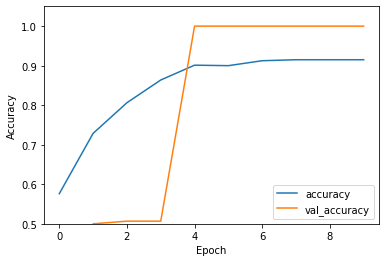

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.05])
plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
# print(test_acc)

In [ ]:
#Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")

# results = model.evaluate(X_test, y_test, batch_size=128)
results = model.evaluate(X_test, y_test, verbose=2)
print("test loss, test acc:", results)

Evaluate on test data
5/5 - 7s - loss: 0.0851 - accuracy: 1.0000
test loss, test acc: [0.085051991045475, 1.0]


In [ ]:
#Generate predictions (probabilities -- the output of the last layer)
#on New data using `predict`
print("Generate predictions for 10 samples")
predictions = model.predict(X_pred)    # should be 5 Welds, 5 Others
print("predictions shape:", predictions.shape)
print("predictions:", predictions)

Generate predictions for 10 new samples
predictions shape: (10, 2)
predictions: [[-0.7360637   1.054744  ]
 [-0.7312721   1.0476738 ]
 [-0.7388457   1.0589201 ]
 [-0.7515298   1.0783031 ]
 [-0.77328974  1.1101608 ]
 [ 1.314418   -2.7955344 ]
 [ 1.3308545  -2.827912  ]
 [ 1.2334243  -2.6327274 ]
 [ 1.2685076  -2.7047887 ]
 [ 1.305716   -2.7800007 ]]
